In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, ensemble
sns.set()
import sklearn.metrics
import dill
import xgboost as xgb
import matplotlib


In [2]:
train = dill.load(open('trainETHBTC.dill', 'rb'))
val = dill.load(open('validationETHBTC.dill', 'rb'))


In [5]:
def datapreview():
    l = [train,val]
    name = ['train','val']
    for i, k in enumerate(l):
        print(name[i])
        print(" ")
        print(k.shape)
        print(" ")
        print(name[i],k.count())
    

In [6]:
datapreview()

train
 
(4929394, 50)
 
train Unnamed: 0                                      4929394
time_index                                      4929394
label                                           4929394
regular_Ceiling_Floors_15                       4929394
regular_Trend_Speed_3                           4929394
regular_Last2_trend                             4929394
irregular_Dynamic_Pressure                      4929394
irregular_liquid_orderbook_slope                4929394
regular_Consecutive_Large_Order_Flow            4929394
regular_Ceiling_Floors_9                        4929394
regular_Ceiling_Floors_17                       4929394
regular_Ceiling_Floors_13                       4929394
irregular_liquid_update_rate                    4929394
regular_current_trend_last_trend_ratio          4927874
regular_mid_ma_diff                             4929394
irregular_Large_Quote_EMA                       4929394
irregular_liquid_rapid_change                   4929394
regular_Ceiling_Fl

In [7]:

def dropHighCorrFeatures(df):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
    df.drop(to_drop, axis=1,inplace=True)
    plt.figure(figsize=(14,10))
    #sns_plot = sns.heatmap((X[col2].sample(frac=0.2).corr()),cmap='winter')
    sns_plot = sns.heatmap((df[df].sample(frac=0.2).corr()))
    plt.show()
 


In [8]:
def dfpreprocess(df):
    df.set_index('time_index',inplace=True)
    df.drop(['Unnamed: 0'], axis=1,inplace=True)
    #df.dropna(inplace = True)
    df.drop(['irregular_liquid_spread'], axis=1,inplace=True )
    df.fillna(df.mean(), inplace = True)
    #optional
    #dropHighCorrFeatures(df)
    
    y = df.label
    X = df[df.columns[1:]]
    return X, y
    
    
    

In [9]:
X0,y0 = dfpreprocess(train)

X_test,y_test = dfpreprocess(val)
X0.shape

(4929394, 46)

In [10]:
X_train,y_train = X0[:3700000],y0[:3700000]
X_val, y_val = X0[3700000:], y0[3700000:]

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)
#print(X_test2.shape)

(3700000, 46)
(3700000,)
(2241460, 46)
(2241460,)
(1229394, 46)
(1229394,)


In [12]:
def checkAcc(predict, y_test):
    temp = np.multiply(predict, np.array(y_test))
    res = [i for i in temp if i > 0]
    acc = len(res)/len(predict)
    print("direction prediction accuracy", acc)
    return acc
    
    


## Extreme Random Forest

In [2]:


extra_reg = ensemble.ExtraTreesRegressor()
gs = model_selection.GridSearchCV(
    extra_reg,
    {"n_estimators":range(10,101,10), 'min_samples_leaf': range(20,50,5),
    'min_samples_split': range(15,36,5) },
    cv=5,  # 5-fold cross validation
    n_jobs=4,  # run each hyperparameter in one of two parallel jobs
    scoring='r2',
    verbose = 5
)


NameError: name 'ensemble' is not defined

In [ ]:
gs.fit(X_val[:10000], y_val[:10000])
print ("Best: %f using %s" % (gs.best_score_, gs.best_params_))



In [38]:
extra_reg =ensemble.ExtraTreesRegressor(min_samples_split=30, n_estimators=40 ,min_samples_leaf= 35, n_jobs=-1,verbose=7)
extra_reg.fit(X_train, y_train)
pre1 = extra_reg.predict(X_test)
checkAcc(pre1, y_test)

building tree 1 of 40building tree 2 of 40
building tree 3 of 40

building tree 4 of 40
building tree 5 of 40
building tree 6 of 40
building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.3min


building tree 29 of 40
building tree 30 of 40
building tree 31 of 40
building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40
building tree 38 of 40
building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  5.4min finished
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    3.2s finished


NameError: name 'checkAcc' is not defined

In [13]:
extra_reg = ensemble.ExtraTreesRegressor(n_estimators=100,n_jobs=-1,verbose=7)
extra_reg.fit(X_train, y_train)
X_test.isnull().values.any()
pre1 = extra_reg.predict(X_test)
checkAcc(pre1, y_test)

building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  6.3min


building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 16.4min


building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 25.2min finished
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   16.0s finished


direction prediction accuracy 0.605920694547304


0.605920694547304

In [22]:
extra_reg.feature_importances_

array([ 0.02738475,  0.0287216 ,  0.03255207,  0.00220441,  0.02164888,
        0.00936075,  0.02941962,  0.02425937,  0.02453431,  0.00709501,
        0.03028614,  0.03959805,  0.01475061,  0.01473829,  0.0247853 ,
        0.02409402,  0.03696351,  0.06953433,  0.02041621,  0.01250463,
        0.00806953,  0.02493271,  0.02157555,  0.02340058,  0.01400459,
        0.021289  ,  0.01829556,  0.0073275 ,  0.00626181,  0.00247177,
        0.05407454,  0.00224684,  0.02512382,  0.01416804,  0.00338498,
        0.01875814,  0.01682196,  0.01881276,  0.01630757,  0.03157646,
        0.0255406 ,  0.00987518,  0.01428679,  0.027773  ,  0.03296978,
        0.04579907])

In [25]:
dic = dict(zip(X_train.columns,extra_reg.feature_importances_))

In [31]:
dic = dict(zip(X_train.columns,extra_reg.feature_importances_))
dicsort = sorted(dic.items(), key = lambda item: item[1], reverse = True)
dicsort

[('irregular_Mid_Last_diff_EMA', 0.06953432987096049),
 ('regular_current_trend_last_large_trend_ratio', 0.054074536324772132),
 ('irregular_liquid_hour', 0.04579906997108945),
 ('regular_mid_ma_diff', 0.039598046916817509),
 ('irregular_liquid_orderbook_density', 0.036963513891646677),
 ('regular_Ceiling_Floors_7', 0.032969781819129948),
 ('regular_Last2_trend', 0.032552069822942641),
 ('regular_Ceiling_Floors_5', 0.031576463173963176),
 ('regular_current_trend_last_trend_ratio', 0.030286141457628587),
 ('regular_Ceiling_Floors_9', 0.0294196172449969),
 ('regular_Trend_Speed_3', 0.028721599623781787),
 ('regular_Ceiling_Floors_19', 0.027773004003447926),
 ('regular_Ceiling_Floors_15', 0.027384752962930307),
 ('regular_last_last2_ratio', 0.025540600305117497),
 ('regular_Ceiling_Floors_3', 0.025123822644655326),
 ('irregular_weighted_middle_price_diff', 0.024932712903738288),
 ('regular_Ceiling_Floors_11', 0.024785297919402122),
 ('regular_Ceiling_Floors_13', 0.024534308098193586),
 ('

## XGBoost



In [14]:
dtrain = xgb.DMatrix(X_train,y_train)
dtest = xgb.DMatrix(X_test, y_test)
dval = xgb.DMatrix(X_val, y_val)
   

In [10]:
def xgboostRegressorProcess(dtrain,dval,dtest):

    
    param = {'max_depth': 10, 'eta': 0.1, 'verbosity':2,'subsample':0.8}
    param['nthread'] = 4
    param['eval_metric'] = 'rmse'

    evallist = [(dval, 'eval')]    
    
    num_round = 150
    bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=10)
    

    ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
    checkAcc(ypred, y_test)
    xgb.plot_importance(bst)
    plt.show()
    


In [15]:

param = {'max_depth': 10, 'eta': 0.1, 'verbosity':2,'subsample':0.8}
param['nthread'] = 4
param['eval_metric'] = 'rmse'

evallist = [(dval, 'eval')]    

num_round = 150
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=10)



[00:35:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[0]	eval-rmse:0.45025
Will train until eval-rmse hasn't improved in 10 rounds.
[00:35:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[1]	eval-rmse:0.40502
[00:35:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[2]	eval-rmse:0.36449
[00:35:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[3]	eval-rmse:0.32800
[00:35:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[4]	ev

In [16]:

ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
checkAcc(ypred, y_test)

direction prediction accuracy 0.6132092475440115


0.6132092475440115

In [36]:
dicxgb = bst.get_fscore()
dicxgb = sorted(dicxgb.items(), key = lambda item: item[1], reverse = True)


In [38]:
dicsort

[('irregular_Mid_Last_diff_EMA', 0.06953432987096049),
 ('regular_current_trend_last_large_trend_ratio', 0.054074536324772132),
 ('irregular_liquid_hour', 0.04579906997108945),
 ('regular_mid_ma_diff', 0.039598046916817509),
 ('irregular_liquid_orderbook_density', 0.036963513891646677),
 ('regular_Ceiling_Floors_7', 0.032969781819129948),
 ('regular_Last2_trend', 0.032552069822942641),
 ('regular_Ceiling_Floors_5', 0.031576463173963176),
 ('regular_current_trend_last_trend_ratio', 0.030286141457628587),
 ('regular_Ceiling_Floors_9', 0.0294196172449969),
 ('regular_Trend_Speed_3', 0.028721599623781787),
 ('regular_Ceiling_Floors_19', 0.027773004003447926),
 ('regular_Ceiling_Floors_15', 0.027384752962930307),
 ('regular_last_last2_ratio', 0.025540600305117497),
 ('regular_Ceiling_Floors_3', 0.025123822644655326),
 ('irregular_weighted_middle_price_diff', 0.024932712903738288),
 ('regular_Ceiling_Floors_11', 0.024785297919402122),
 ('regular_Ceiling_Floors_13', 0.024534308098193586),
 ('

In [55]:
sorted(mat.items(), key = lambda x: x[1][0])

[('regular_Ceiling_Floors_15', (0, 12)),
 ('regular_Last2_trend', (1, 6)),
 ('regular_current_trend_last_large_trend_ratio', (2, 1)),
 ('regular_Trend_Speed_3', (3, 10)),
 ('irregular_Large_Quote_EMA', (4, 30)),
 ('regular_relevant_trend_BTCUSDT', (5, 22)),
 ('irregular_liquid_hour', (6, 2)),
 ('regular_last_last2_ratio', (7, 13)),
 ('regular_Ceiling_Floors_9', (8, 9)),
 ('irregular_liquid_orderbook_slope', (9, 21)),
 ('regular_Ceiling_Floors_17', (10, 18)),
 ('regular_Ceiling_Floors_19', (11, 11)),
 ('regular_Min_Max_Position', (12, 20)),
 ('regular_Ceiling_Floors_5', (13, 7)),
 ('irregular_liquid_orderbook_density', (14, 4)),
 ('regular_relevant_trend_ETHUSDT', (15, 23)),
 ('regular_Ceiling_Floors_13', (16, 17)),
 ('regular_Ceiling_Floors_7', (17, 5)),
 ('regular_Ceiling_Floors_11', (18, 16)),
 ('regular_current_trend_last_trend_ratio', (19, 8)),
 ('irregular_liquid_orderbook_thickness', (20, 27)),
 ('regular_current_trend_speed', (21, 25)),
 ('regular_current_trend', (22, 28)),
 ('i

In [56]:
mat = dict()
for i,k in enumerate(lxgb):
    mat[k] =  (i, lrf.index(k))
len(mat)

46

In [49]:
lxgb = [i[0] for i in dicxgb]
lrf = [i[0] for i in dicsort]


['regular_Ceiling_Floors_15', 'regular_Last2_trend', 'regular_current_trend_last_large_trend_ratio', 'regular_Trend_Speed_3', 'irregular_Large_Quote_EMA', 'regular_relevant_trend_BTCUSDT', 'irregular_liquid_hour', 'regular_last_last2_ratio', 'regular_Ceiling_Floors_9', 'irregular_liquid_orderbook_slope', 'regular_Ceiling_Floors_17', 'regular_Ceiling_Floors_19', 'regular_Min_Max_Position', 'regular_Ceiling_Floors_5', 'irregular_liquid_orderbook_density', 'regular_relevant_trend_ETHUSDT', 'regular_Ceiling_Floors_13', 'regular_Ceiling_Floors_7', 'regular_Ceiling_Floors_11', 'regular_current_trend_last_trend_ratio', 'irregular_liquid_orderbook_thickness', 'regular_current_trend_speed', 'regular_current_trend', 'irregular_liquid_rapid_change', 'irregular_orderbook_slope_diff_EMA', 'regular_current_last2_ratio', 'regular_mid_ma_diff', 'irregular_Dynamic_Pressure', 'regular_Ceiling_Floors_3', 'irregular_weighted_middle_price_diff', 'irregular_adjusted_ask_bid_amount_ratio_EMA', 'regular_Order

In [37]:
dicxgb[]

[('regular_Ceiling_Floors_15', 2960),
 ('regular_Last2_trend', 1815),
 ('regular_current_trend_last_large_trend_ratio', 1728),
 ('regular_Trend_Speed_3', 1668),
 ('irregular_Large_Quote_EMA', 1412),
 ('regular_relevant_trend_BTCUSDT', 1339),
 ('irregular_liquid_hour', 1225),
 ('regular_last_last2_ratio', 1217),
 ('regular_Ceiling_Floors_9', 1157),
 ('irregular_liquid_orderbook_slope', 1125),
 ('regular_Ceiling_Floors_17', 1051),
 ('regular_Ceiling_Floors_19', 1034),
 ('regular_Min_Max_Position', 1012),
 ('regular_Ceiling_Floors_5', 918),
 ('irregular_liquid_orderbook_density', 910),
 ('regular_relevant_trend_ETHUSDT', 900),
 ('regular_Ceiling_Floors_13', 835),
 ('regular_Ceiling_Floors_7', 832),
 ('regular_Ceiling_Floors_11', 818),
 ('regular_current_trend_last_trend_ratio', 755),
 ('irregular_liquid_orderbook_thickness', 714),
 ('regular_current_trend_speed', 672),
 ('regular_current_trend', 666),
 ('irregular_liquid_rapid_change', 657),
 ('irregular_orderbook_slope_diff_EMA', 650),
 

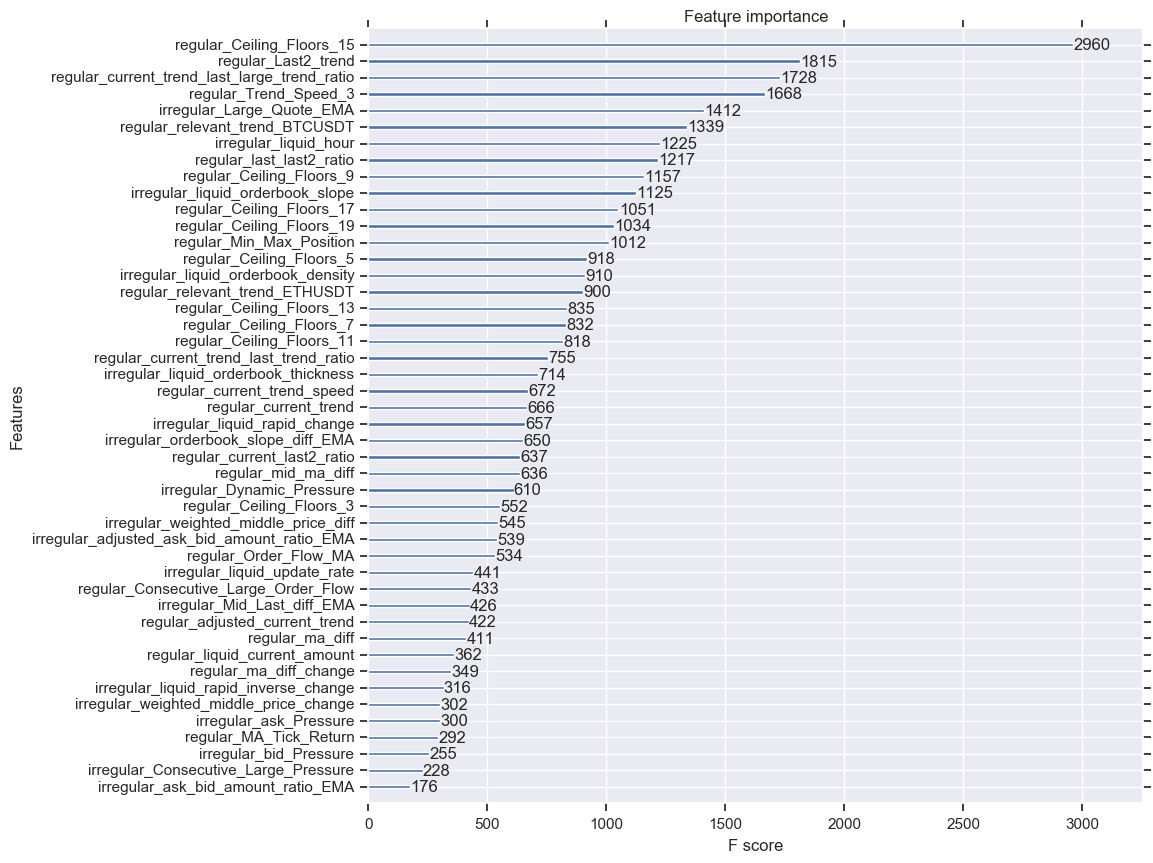

In [19]:
matplotlib.rcParams['figure.dpi'] = 144
matplotlib.rcParams["figure.figsize"] = (10,10)
xgb.plot_importance(bst)
plt.show()

In [ ]:
from sklearn import model_selection
xgb_model = xgb.XGBRegressor()
#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.1,0.4,0.9], #so called `eta` value
              'max_depth': [3,6],
              'subsample': [0.5,0.8],
              'n_estimators': [100], #number of trees, change it to 1000 for better results
              }


clf = model_selection.GridSearchCV(xgb_model, parameters, n_jobs=-1,verbose=5,scoring='neg_mean_squared_error')
clf.fit(X_val, y_val)




In [ ]:
#trust your CV!
best_parameters, score, _ = max(clf.grid_scores_, key=lambda x: x[1])
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

test_probs = clf.predict_proba(test[features])[:,1]
